LAB 4
as dataset gets bigger. Cross validation (folds) become less important
quasi newton methods lbfgs work better for smaller datasets
for bigger datasets you should just use stochastic gradient descent

In [26]:
#steps for reading images ->
#merge the folders in the test and train folders together and then move it to be the only folders in the `intel-image-classification` directory
#in the end you should have the intel-image-classification folder and a few folders that say forest, city, etc...
#steps... mix the two sets together
yourpath = 'intel-image-classification'
import re
import contextlib
import os
import cv2
images = {}
X = []
y = []
list_counter = -1
strs = []
for root, dirs, files in os.walk(yourpath, topdown=False):
    for name in files:
        try:
            regx = re.compile("[a-zA-Z]+$")
            image = cv2.imread(os.path.join(root, name),0)
            image = cv2.resize(image,(150,150))
            image = (image.flatten())
            key = regx.search(root).group(0)
            if key not in strs:
                strs.append(key)
                list_counter += 1
            image = (image/255.0 - .5)
            X.append(image)
            y.append(list_counter)
        except:
            print("SJIP")
            continue

SJIP


In [27]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#y = np.array(y)
#X = np.array(X)

In [31]:
Xp = []
for i in X:
    Xp.append(i.reshape(1,22500))
X = np.array(Xp).reshape(len(Xp),22500)
print(X.shape)

(17034, 22500)


(17034, 22500)
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]
[ 0.22156863  0.00196078  0.1        ... -0.19803922 -0.23333333
 -0.24901961]


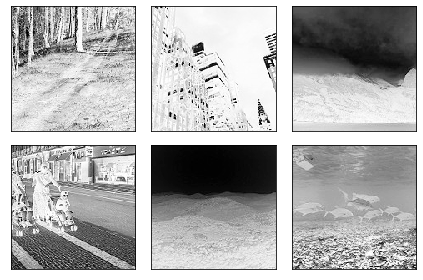

In [34]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
y = np.array(y)
print(X.shape)
for i in range(6):
    print(X[0])
    img = X[y == i][0].reshape(150,150)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [35]:
#We still need to describe the dataset


In [36]:
#for classification we should not use accuracy. We should use something like false positive rate
#check out this link for a great list of ways to evaluate neural networks 
#https://jenstirrup.com/2017/08/01/how-do-you-evaluate-the-performance-of-a-neural-network-focus-on-azureml/

In [100]:
#I do not think K-fold will help us much. Why? We have plenty of data for each class. Lets see how big each class is to prove it
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)
#print((X).reshape(17034, 22500))

[[  0 178]
 [  1 182]
 [  2 177]
 [  3 183]
 [  4 181]
 [  5 182]
 [  6 181]
 [  7 179]
 [  8 174]
 [  9 180]]


In [51]:
#ask in class what would be a good split for 3000 items in each class?
#for now lets just do an 80/20 split
from sklearn.model_selection import train_test_split
#TODO: TEST WITH THE NUMBERS DATASET
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8517, 22500)
(8517,)
(8517, 22500)
(8517,)


In [513]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None, steps=2, phi="S"):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.steps = steps
        self.phi = phi
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden + 1)
        return W1, W2
#         Ws = []
#         W1_num_elems = (self.n_features_ + 1)*self.n_hidden
#         W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
#         W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
#         Ws.append(W1)
#         for i in range(1, self.steps):
#             if i +1 == self.steps:
#                 W2_num_elems = (self.n_hidden + i)*self.n_output_
#                 W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
#                 W2 = W2.reshape(self.n_output_, self.n_hidden + i)
#                 Ws.append(W2)
#             else:
#                 W2_num_elems = (self.n_hidden + i)*self.n_output_
#                 W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
#                 W2 = W2.reshape(self.n_output_, self.n_hidden + i)
#                 print(W2.shape)
#                 Ws.append(W2)
#         return Ws
    
    @staticmethod
    def _sigmoid(z):
        # we should also have a linear function too
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _linear(z):
        print("LINEAR")
        return z
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Ws):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        means = 0
        for w in Ws:
            means += np.mean(w[:, 1:] ** 2)
        #Maybe?? Check this
        return (lambda_/len(Ws)) * (means)**(1/len(Ws))
    
    def _cost(self,A3,Y_enc,Ws):
        '''Get the objective function value'''
        #A3 = yhat
        cost = -np.mean(Y_enc * np.log(A3) + (1-Y_enc)*np.log(1-A3))
        #cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    

In [514]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        #put this joint into a for loop with a list of all As and Zs
        As = [self._add_bias_unit(X.T, how='row')]
        Zs = [W[0] @ As[0]]
        for i in range(1,self.steps):
            if (self.phi == "L"):
                A =self._linear(Zs[-1])
            else:
                A = self._sigmoid(Zs[-1])
            A = self._add_bias_unit(A, how='row')
            print("A SHAPE", A.shape)
            print("W SHAPe", W[i].shape)
            #Z is supposed to be 51 and then 52 which means the w[i] needs to be 51 rows then 52
            Z = W[i] @ A
            print("Z SHAPE", Z.shape)
            Zs.append(Z)
            As.append(A)
        if (self.phi == "L"):
            As.append(self._linear(Zs[-1]))
        else:
            As.append(self._sigmoid(Zs[-1]))
        return As, Zs
    
#     def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
#         """ Compute gradient step using backpropagation.
#         """
#         # backpropagation
#         grad1 = np.zeros(W1.shape)
#         grad2 = np.zeros(W2.shape)
        
#         # for each instance's activations 
#         #this is freaking slow
#         for (a1,a2,a3,y) in zip(A1.T,A2.T,A3.T,Y_enc.T):
#             dJ_dz2 = -2*(y - a3)*a3*(1-a3)
#             dJ_dz1 = dJ_dz2 @ W2 @ np.diag(a2*(1-a2))
                         
#             grad2 += dJ_dz2[:,np.newaxis]  @ a2[np.newaxis,:]
#             grad1 += dJ_dz1[1:,np.newaxis] @ a1[np.newaxis,:] 
#             # don't incorporate bias term in the z1 gradient 
#             # (its added in a2 from another layer)
            

#         # regularize weights that are not bias terms
#         grad1[:, 1:] += (W1[:, 1:] * self.l2_C)
#         grad2[:, 1:] += (W2[:, 1:] * self.l2_C)

#         return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        As, Zs = self._feedforward(X, self.Ws)
        y_pred = np.argmax(As[-1], axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):

#             if print_progress>0 and (i+1)%print_progress==0:
#                 sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
#                 sys.stderr.flush()

#             # feedforward all instances
#             As, Zs = self._feedforward(X_data,self.Ws)
            
#             cost = self._cost(As[-1],Y_enc,self.Ws)
#             self.cost_.append(cost)

#             # compute gradient via backpropagation
#             grads = self._get_gradient(As=As, Zs = Zs, Y_enc=Y_enc,
#                                               Ws = self.Ws)
            
            
#             for i in range(len(grads)):
#                 Self.Ws[i] -= grads[i] * self.eta
            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            As, Zs = self._feedforward(X_data,self.Ws)
            
            cost = self._cost(As[-1],Y_enc,self.Ws)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grads = self._get_gradient(As=As, Zs=Zs, Y_enc=Y_enc,
                                              Ws=self.Ws)
                
            for j in range(len(grads)):
                print("GRADS", grads[j].shape, self.Ws[j].shape)
                self.Ws[j] -= self.eta * grads[j]
            

        return self

In [515]:
class TwoLayerPerceptronVectorized(TwoLayerPerceptron):
    # just need a different gradient calculation
    def _get_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        #we've got to do all of them here
        Vs = []
        for i in range(2,len(As)):
            print("V",Y_enc.shape, As[i].shape)
            V = -2*(Y_enc-As[i])*As[i]*(1-As[i])
            Vs.append(V)
        V1 = As[1]*(1-As[1])*(Ws[1].T @ Vs[0])
        Vs.insert(0,V1)
        
        counter = 0
        grads = []
        for i in reversed(range(len(Vs))):
            print("REVERSED",i)
            grad = Vs[i][counter:,:] @ As[i].T
            grad[:,1:] += Ws[i][:, 1:] * self.l2_C
            counter +=1
            grads.insert(0,grad)
        
        

        return grads

In [369]:
###TESTING DATA
# lets load up the handwritten digit dataset
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

ds = load_digits()
print(ds.data)
X = ds.data/16.0-0.5
print(X)
y = ds.target
print(y)
print(X.shape)
print(y.shape)
print(np.min(X),np.max(X))
print(np.unique(y))
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[-0.5    -0.5    -0.1875 ... -0.5    -0.5    -0.5   ]
 [-0.5    -0.5    -0.5    ...  0.125  -0.5    -0.5   ]
 [-0.5    -0.5    -0.5    ...  0.5     0.0625 -0.5   ]
 ...
 [-0.5    -0.5    -0.4375 ... -0.125  -0.5    -0.5   ]
 [-0.5    -0.5    -0.375  ...  0.25   -0.5    -0.5   ]
 [-0.5    -0.5     0.125  ...  0.25   -0.4375 -0.5   ]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)
-0.5 0.5
[0 1 2 3 4 5 6 7 8 9]
(1437, 64)
(1437,)
(360, 64)
(360,)


In [518]:
params = dict(n_hidden=50, 
              C=0.1, # tradeoff L2 regularizer
              epochs=200, # iterations
              eta=0.001,  # learning rate
              random_state=1,
             steps=2,
             phi="o")

In [519]:
%%time
from sklearn.metrics import accuracy_score
params['epochs'] = 200
nn = TwoLayerPerceptronVectorized(**params)
print(X_train[0])
nn.fit(X_train, y_train, print_progress=50)
yhat = nn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,yhat))

[-0.5    -0.5    -0.375   0.375   0.4375 -0.3125 -0.5    -0.5    -0.5
 -0.5    -0.0625  0.5     0.1875 -0.5    -0.5    -0.5    -0.5    -0.5
  0.3125  0.4375 -0.4375 -0.5    -0.5    -0.5    -0.5    -0.4375  0.5
  0.1875 -0.5    -0.5    -0.5    -0.5    -0.5    -0.375   0.5     0.0625
 -0.5    -0.5    -0.5    -0.5    -0.5    -0.375   0.5     0.5     0.5
  0.0625 -0.5    -0.5    -0.5    -0.5     0.3125  0.5     0.125   0.5
 -0.0625 -0.5    -0.5    -0.5    -0.3125  0.4375  0.5     0.5    -0.25
 -0.5   ]
A SHAPE (51, 1437)
W SHAPe (10, 51)
Z SHAPE (10, 1437)
V (10, 1437) (10, 1437)
REVERSED 1
REVERSED 0
GRADS (50, 65) (50, 65)


TypeError: 'tuple' object does not support item assignment